In [5]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree
  !pip install geopandas
  !pip install contextily

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import contextily as cx
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [7]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [8]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

Downloaded data/upath17.shp
Downloaded data/upath17.shx
Downloaded data/upath17.dbf
Downloaded data/upath17.prj
Downloaded data/umbra17.shp
Downloaded data/umbra17.shx
Downloaded data/umbra17.dbf
Downloaded data/umbra17.prj


In [10]:
# data pre-processing
path_shapefile_path = os.path.join(data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf

,Name,Time0,Time1,geometry
0,UmbraPath,17:00,19:50,"POLYGON ((-130.08398 45.36563, -130.07227 45.3..."


In [11]:
umbra_shapefile_path = os.path.join(data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf[:5]

,Name,Time,TZ,geometry
0,Umbra01,10:00,PDT,"POLYGON ((-141.73242 44.78022, -141.72070 44.7..."
1,Umbra02,10:10,PDT,"POLYGON ((-130.59961 45.35650, -130.58789 45.3..."
2,Umbra03,10:20,PDT,"POLYGON ((-121.85742 45.20222, -121.84570 45.2..."
3,Umbra04,11:30,MDT,"POLYGON ((-114.77930 44.60543, -114.76758 44.6..."
4,Umbra05,11:40,MDT,"POLYGON ((-108.63867 43.72656, -108.62695 43.7..."


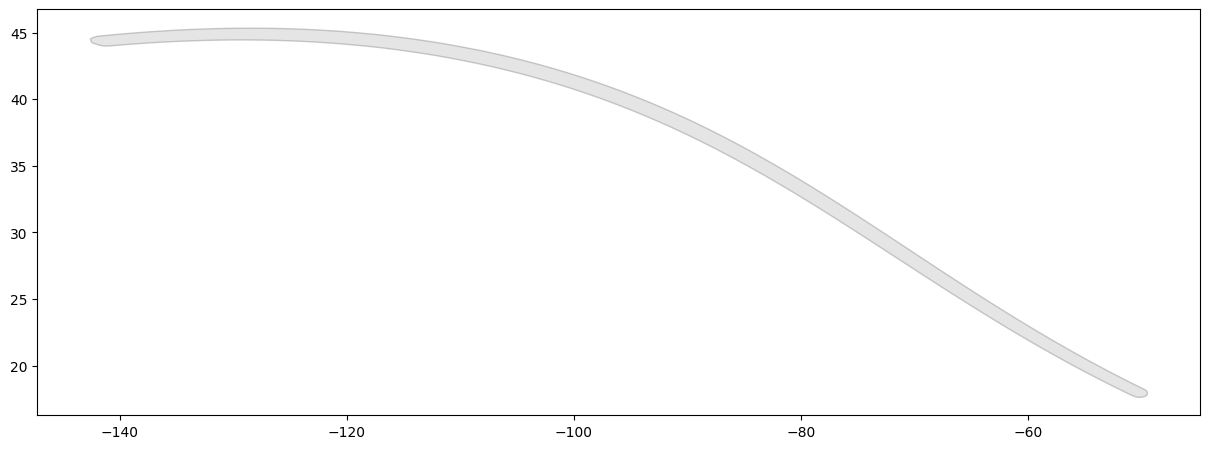

In [12]:
# create a multilayer map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
plt.show()

In [13]:
# add a basemap
providers = cx.providers
providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

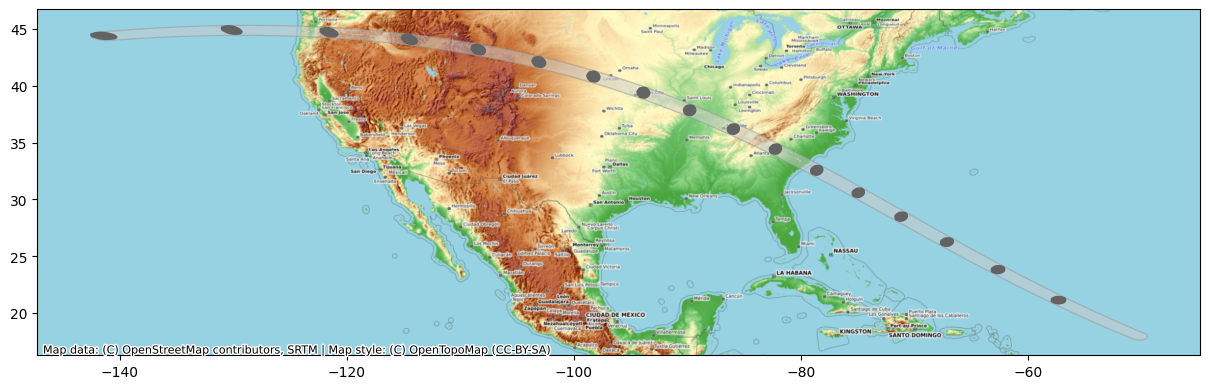

In [15]:
# For overlaying the eclipse path, let’s use the OpenTopoMap basemap. We need to specify a CRS for the map. For now, let’s use the CRS of the original shapefile.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_gdf.crs, source=cx.providers.OpenTopoMap)
plt.show()

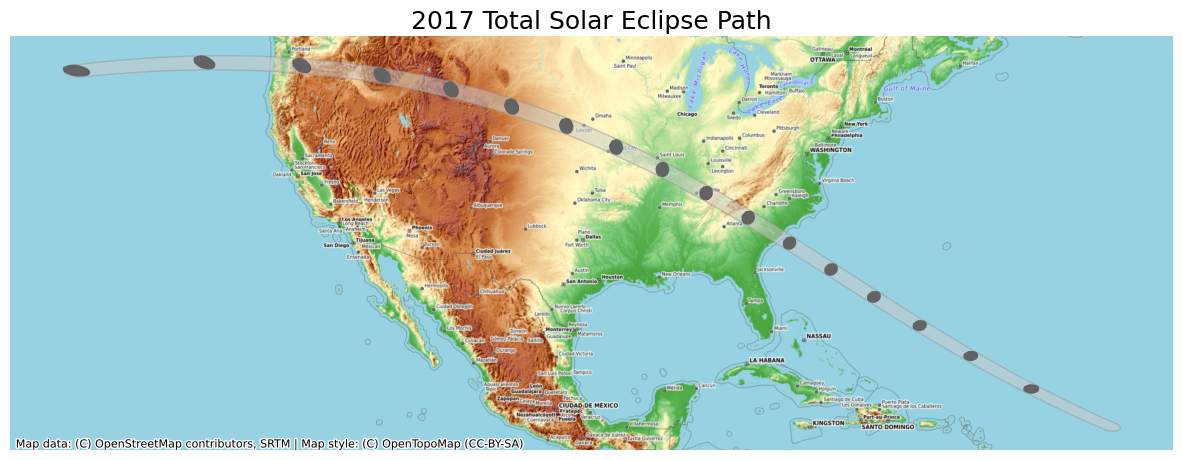

In [16]:
# The web tiles for the basemap are in the Web Mercator CRS (EPSG:3857). When you request them in a different CRS, they are warped to the requested CRS. This may cause the labels to not be legible in some cases. Instead, we can request the tiles in their original CRS and reproject our data layer to its CRS.
path_reprojected = path_gdf.to_crs('EPSG:3857')
umbra_reprojected = umbra_gdf.to_crs('EPSG:3857')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_reprojected.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.OpenTopoMap)
ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)

plt.show()

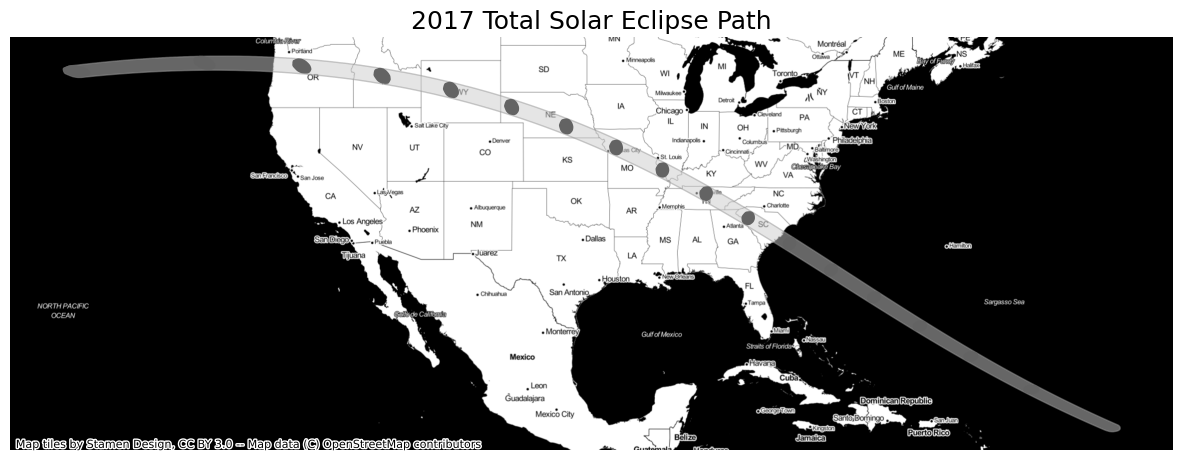

In [19]:
# exercise 4
output_path = os.path.join(output_folder, 'eclipse_path.png')

path_reprojected = path_gdf.to_crs('EPSG:3857')
umbra_reprojected = umbra_gdf.to_crs('EPSG:3857')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_reprojected.plot(ax=ax, facecolor='#636363', edgecolor='none')

cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.Stamen.Toner)
ax.set_axis_off()
ax.set_title('2017 Total Solar Eclipse Path', size = 18)
plt.savefig(output_path)

plt.show()